In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-purchases-behaviour-dataset/customer_data.csv


# import libraries --> data inspection --> data cleaning --> summary statistics --> data visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/kaggle/input/customer-purchases-behaviour-dataset/customer_data.csv')

In [4]:
data.head(10)

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5
5,6,38,Male,7347,Bachelor,South,Silver,occasional,2822,Electronics,0,5
6,7,32,Female,8265,Bachelor,South,Silver,frequent,3293,Clothing,0,7
7,8,24,Female,47773,HighSchool,North,Regular,rare,21794,Books,0,5
8,9,27,Male,19154,College,East,Regular,occasional,5819,Clothing,0,5
9,10,28,Female,24666,HighSchool,North,Regular,rare,8779,Food,0,6


In [5]:
data.tail(10)

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
99990,99991,34,Female,40601,Bachelor,West,Regular,occasional,13850,Clothing,0,2
99991,99992,37,Male,24100,Bachelor,East,Regular,frequent,10307,Clothing,0,4
99992,99993,31,Female,34119,HighSchool,West,Silver,rare,11241,Health,0,5
99993,99994,37,Female,37380,College,South,Regular,rare,13238,Food,0,5
99994,99995,30,Male,30740,HighSchool,South,Regular,frequent,12385,Clothing,0,5
99995,99996,31,Female,19691,College,West,Regular,occasional,7075,Health,0,7
99996,99997,36,Male,17428,HighSchool,South,Regular,rare,6873,Health,0,5
99997,99998,29,Male,13222,College,West,Regular,frequent,5152,Clothing,0,5
99998,99999,31,Female,40093,Bachelor,West,Regular,frequent,16312,Health,1,5
99999,100000,35,Female,22249,College,West,Silver,rare,9426,Health,0,6


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   age                 100000 non-null  int64 
 2   gender              100000 non-null  object
 3   income              100000 non-null  int64 
 4   education           100000 non-null  object
 5   region              100000 non-null  object
 6   loyalty_status      100000 non-null  object
 7   purchase_frequency  100000 non-null  object
 8   purchase_amount     100000 non-null  int64 
 9   product_category    100000 non-null  object
 10  promotion_usage     100000 non-null  int64 
 11  satisfaction_score  100000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 9.2+ MB


In [7]:
#check missing values

missing_values = data.isnull().sum()

In [8]:
missing_values

id                    0
age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64

In [9]:
# check duplicates values

duplicates_rows = data[data.duplicated()]

In [10]:
duplicates_rows

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score


No duplicates row and nan values in dataset

In [11]:
#summary statistics

data.describe()

,id,age,income,purchase_amount,promotion_usage,satisfaction_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,30.003260,27516.269880,9634.790840,0.300800,5.009650
std,28867.657797,4.480535,12996.782587,4799.339449,0.458608,1.038714
min,1.000000,12.000000,5000.000000,1118.000000,0.000000,0.000000
25%,25000.750000,27.000000,16271.750000,5583.000000,0.000000,4.000000
50%,50000.500000,30.000000,27584.500000,9452.000000,0.000000,5.000000
75%,75000.250000,33.000000,38747.250000,13350.000000,1.000000,6.000000
max,100000.000000,49.000000,50000.000000,26204.000000,1.000000,10.000000


In [12]:
data['id'].value_counts()

id
1         1
66651     1
66673     1
66672     1
66671     1
         ..
33332     1
33331     1
33330     1
33329     1
100000    1
Name: count, Length: 100000, dtype: int64

In [13]:
data['age'].value_counts()

age
30    8867
31    8645
29    8636
28    8266
32    8034
33    7214
27    7022
34    5894
26    5882
35    4873
25    4856
36    3583
24    3576
37    2697
23    2636
38    1791
22    1790
39    1200
21    1187
20     743
40     682
41     481
19     457
42     242
18     233
17     143
43     125
16      66
44      58
15      39
45      35
47      13
14      13
46      11
13       4
12       3
48       2
49       1
Name: count, dtype: int64

In [14]:
data['income'].value_counts()

income
39596    12
28944    10
12803    10
36828    10
21832     9
         ..
47076     1
44614     1
14934     1
45093     1
35207     1
Name: count, Length: 40003, dtype: int64

In [15]:
data['purchase_amount'].value_counts()

purchase_amount
8368     19
3800     17
11464    17
2831     17
3696     17
         ..
18222     1
18773     1
1980      1
19211     1
18104     1
Name: count, Length: 18902, dtype: int64

In [16]:
data['promotion_usage'].value_counts()

promotion_usage
0    69920
1    30080
Name: count, dtype: int64

In [17]:
data['satisfaction_score'].value_counts()

satisfaction_score
5     38490
6     24315
4     23854
7      6123
3      6018
8       616
2       534
9        30
1        18
10        1
0         1
Name: count, dtype: int64

In [18]:
data.columns

Index(['id', 'age', 'gender', 'income', 'education', 'region',
       'loyalty_status', 'purchase_frequency', 'purchase_amount',
       'product_category', 'promotion_usage', 'satisfaction_score'],
      dtype='object')

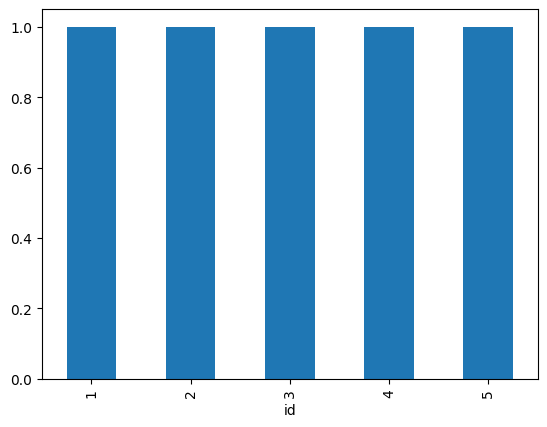

In [19]:
# data visualization

data['id'].head().value_counts().plot(kind='bar')
plt.show()

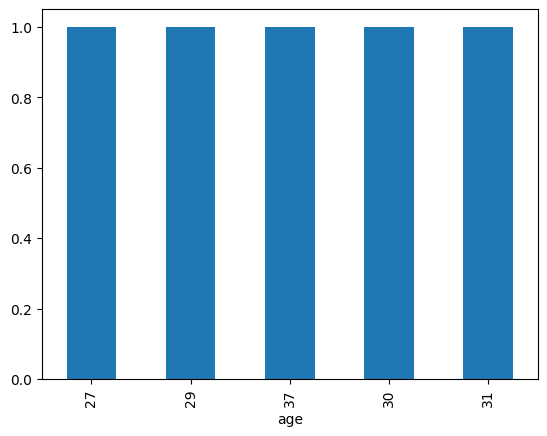

In [20]:
data['age'].head().value_counts().plot(kind='bar')
plt.show()

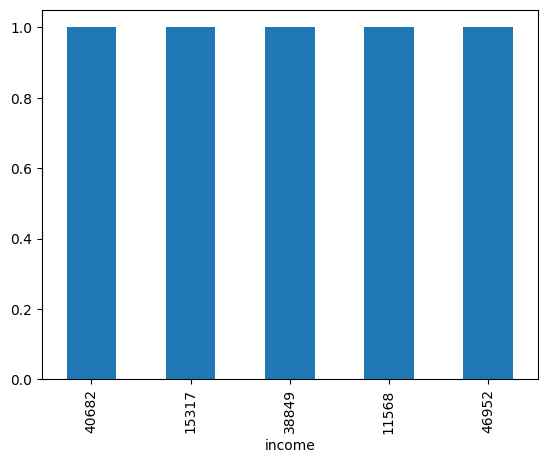

In [21]:
data['income'].head().value_counts().plot(kind='bar')
plt.show()

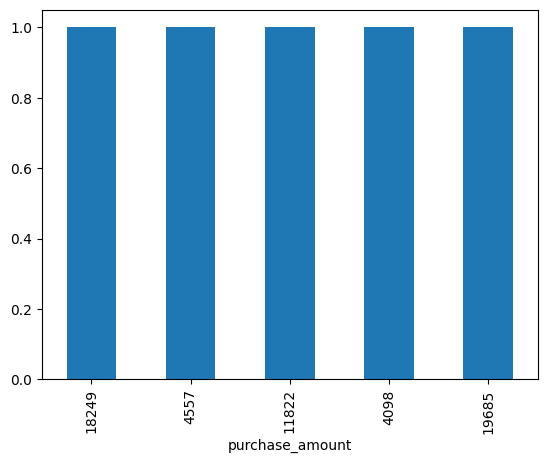

In [22]:
data['purchase_amount'].head().value_counts().plot(kind='bar')
plt.show()

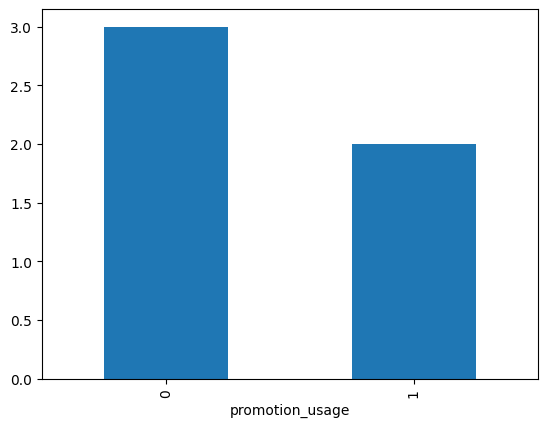

In [23]:
data['promotion_usage'].head().value_counts().plot(kind='bar')
plt.show()

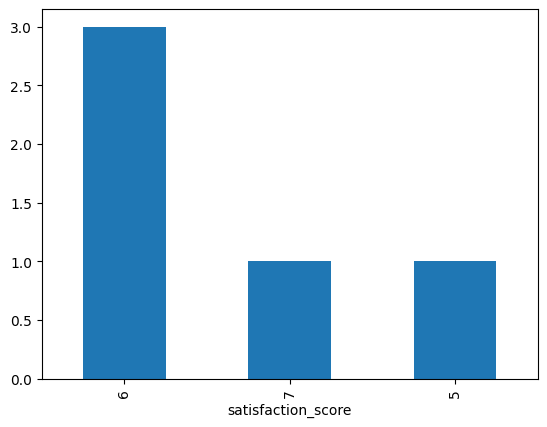

In [24]:
data['satisfaction_score'].head().value_counts().plot(kind='bar')
plt.show()

In [25]:
data.columns

Index(['id', 'age', 'gender', 'income', 'education', 'region',
       'loyalty_status', 'purchase_frequency', 'purchase_amount',
       'product_category', 'promotion_usage', 'satisfaction_score'],
      dtype='object')

# Loyalty Customer

In [26]:
# Check loyalty status of each customer and count loyal and not loyal customers
loyal_customers = data[data['loyalty_status'] == 'loyal']
loyal_count = loyal_customers.shape[0]

not_loyal_customers = data[data['loyalty_status'] != 'loyal']
not_loyal_count = not_loyal_customers.shape[0]


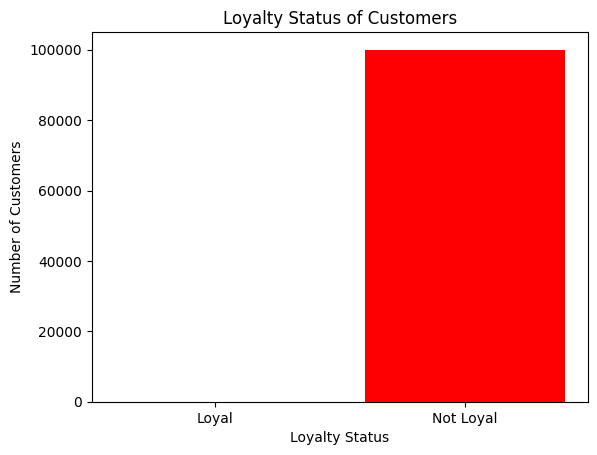

In [27]:
# Visualize loyalty status using a bar graph

plt.bar(['Loyal', 'Not Loyal'], [loyal_count, not_loyal_count], color=['green', 'red'])
plt.title('Loyalty Status of Customers')
plt.xlabel('Loyalty Status')
plt.ylabel('Number of Customers')
plt.show()

# Age

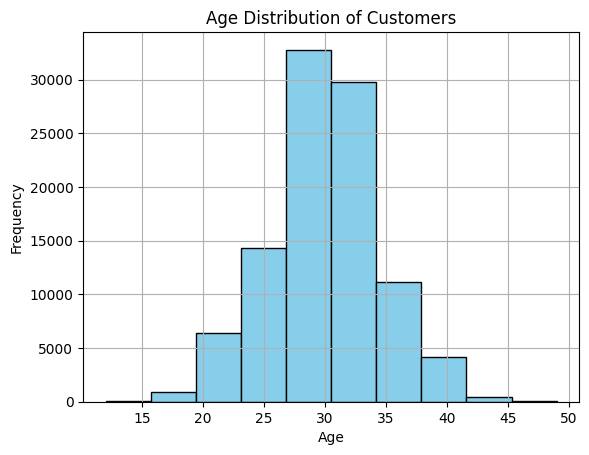

In [28]:
# Plot a histogram for age distribution

plt.hist(data['age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Gender

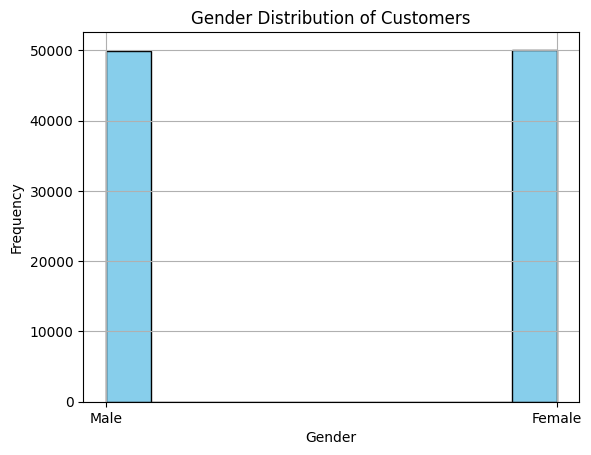

In [32]:
# Plot a histogram for gender of customer distribution

plt.hist(data['gender'], bins=10, color='skyblue', edgecolor='black')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Income

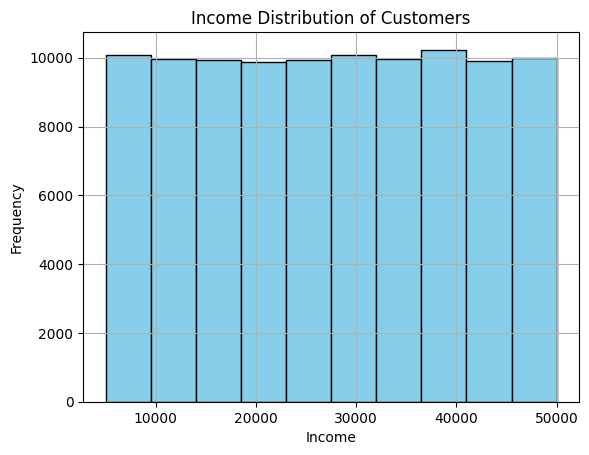

In [33]:
# Plot a histogram for income of customer distribution

plt.hist(data['income'], bins=10, color='skyblue', edgecolor='black')
plt.title('Income Distribution of Customers')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Education

In [34]:
# Count the number of customers in each education level
education_counts = data['education'].value_counts()

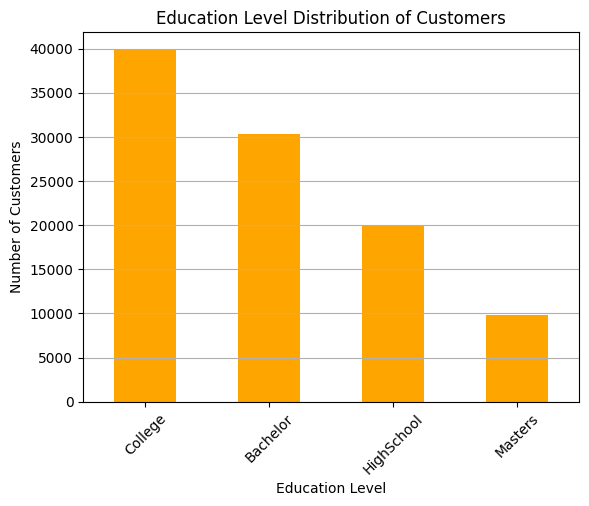

In [35]:
# Visualize education level distribution using a bar graph

education_counts.plot(kind='bar', color='orange')
plt.title('Education Level Distribution of Customers')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.show()

# Region

In [36]:
# Count the number of customers in each region
region_counts = data['region'].value_counts()

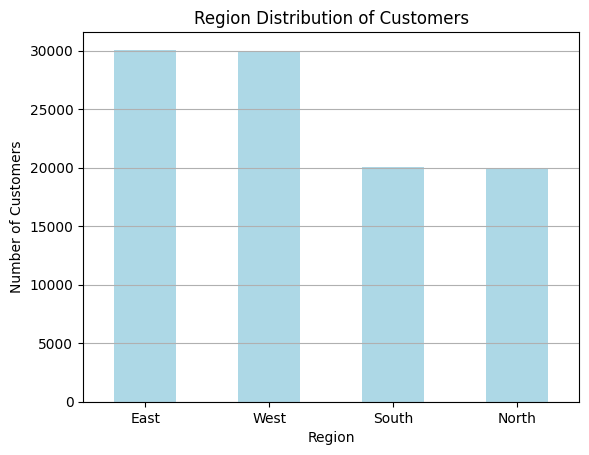

In [37]:
# Visualize region distribution using a bar graph

region_counts.plot(kind='bar', color='lightblue')
plt.title('Region Distribution of Customers')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')
plt.show()

# Customer Satisfaction Scores

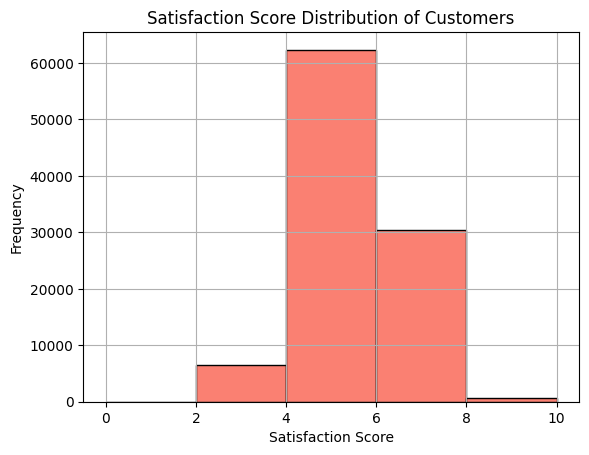

In [38]:
# Plot a histogram for satisfaction score distribution

plt.hist(data['satisfaction_score'], bins=5, color='salmon', edgecolor='black')
plt.title('Satisfaction Score Distribution of Customers')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Frequency of purchases made by the customer

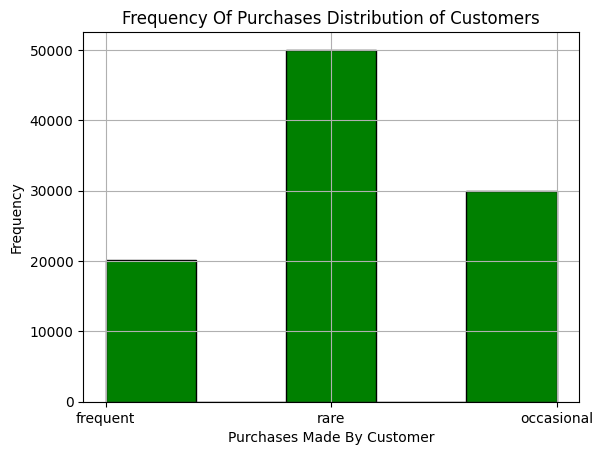

In [40]:
# Plot a histogram for frequency of purchases made by the customer distribution

plt.hist(data['purchase_frequency'], bins=5, color='green', edgecolor='black')
plt.title('Frequency Of Purchases Distribution of Customers')
plt.xlabel('Purchases Made By Customer')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Amount spent by the customer in each purchase.

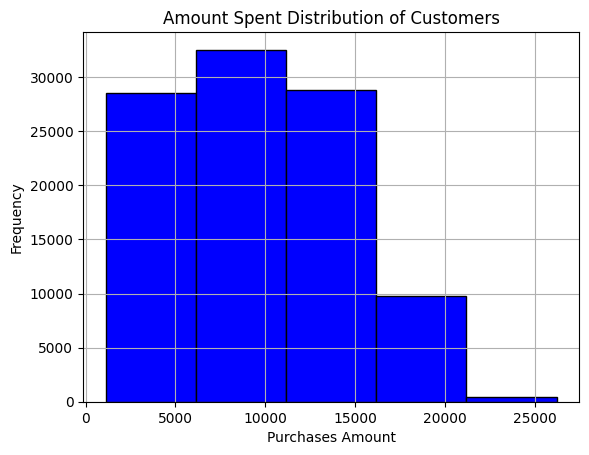

In [42]:
# Plot a histogram for Amount spent by the customer in each purchase distribution

plt.hist(data['purchase_amount'], bins=5, color='blue', edgecolor='black')
plt.title('Amount Spent Distribution of Customers')
plt.xlabel('Purchases Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#  Category of the purchased product.

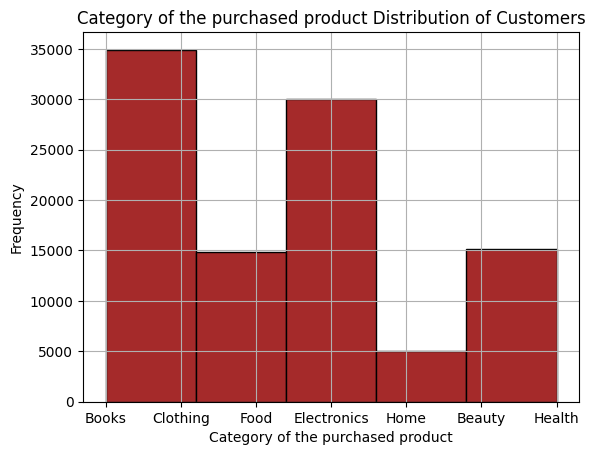

In [45]:
# Plot a histogram for category of the purchased product distribution

plt.hist(data['product_category'], bins=5, color='brown', edgecolor='black')
plt.title('Category of the purchased product Distribution of Customers')
plt.xlabel('Category of the purchased product')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Promotion Usage

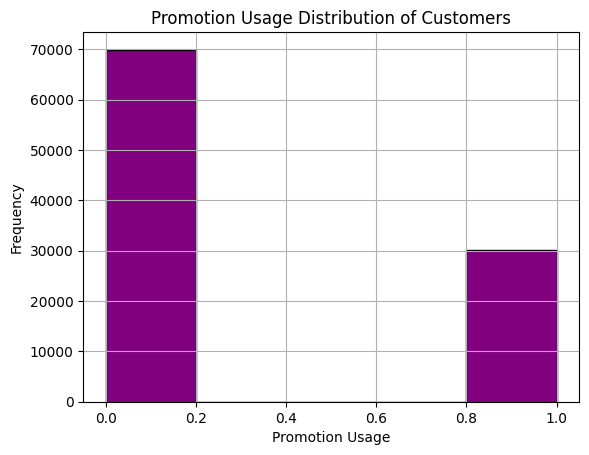

In [47]:
# Plot a histogram for promotion usage distribution

plt.hist(data['promotion_usage'], bins=5, color='purple', edgecolor='black')
plt.title('Promotion Usage Distribution of Customers')
plt.xlabel('Promotion Usage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()